<a href="https://colab.research.google.com/github/NicholasRootWilcox/final/blob/master/ml_final_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:

#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import glob
import PIL
import tensorflow as tf
import random as rn
import pathlib

from keras import backend as K

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from tensorflow import keras

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image



from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image



In [67]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
daisyDir = "/content/drive/MyDrive/myFlowers/daisy"
dandDir = "/content/drive/MyDrive/myFlowers/dandelion"
roseDir = "/content/drive/MyDrive/myFlowers/rose"
sunDir = "/content/drive/MyDrive/myFlowers/sunflower"
tulipDir = "/content/drive/MyDrive/myFlowers/tulip"


In [69]:
x = []
z = []
y = []
x_imageSize = 100
y_imageSize = 100

In [70]:
def assignLabel(img, flowerType):
    return flowerType

In [71]:
def trainDataFunction (flowerType, dir):
    os.getcwd()
    for img in tqdm(os.listdir(dir)):
        label = assignLabel(img, flowerType)
        path = os.path.join(dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (x_imageSize, y_imageSize))

        x.append(np.array(img))
        z.append(str(label))

In [72]:
#TRAIN DAISY
trainDataFunction('daisy', daisyDir)
print(len(x))

100%|██████████| 764/764 [00:05<00:00, 131.95it/s]

764


In [73]:
#TRAIN ROSE
trainDataFunction('rose', roseDir)
print(len(x))

100%|██████████| 789/789 [00:07<00:00, 110.77it/s]

1553


In [74]:
#TRAIN TULIP
trainDataFunction('tulip', tulipDir)
print(len(x))

100%|██████████| 999/999 [00:06<00:00, 152.30it/s]

2552


In [75]:
#TRAIN dandelion
trainDataFunction('dandelion', dandDir)
print(len(x))

100%|██████████| 1062/1062 [00:06<00:00, 157.13it/s]

3614


In [76]:
#TRAIN sunflower
trainDataFunction('sunflower', sunDir)
print(len(x))

100%|██████████| 733/733 [00:04<00:00, 155.32it/s]

4347


In [77]:
# total of 4317 images

In [78]:
# Enable Encoder for Y axis to begin one hot encoding process
# Used to encode target values such as y, noy x which we already have

le = LabelEncoder()
y = le.fit_transform(z)
y = to_categorical(y, 5) # create label for num of classes
x = np.array(x)
x = x/255 # preprocessing


In [79]:
## SPLIT INTO TRAINING SETS
## 80 20 Training Validation

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 81)

In [80]:
# Create the random seeds

np.random.seed(81)
rn.seed(81)
tf.random.set_seed(81)

In [81]:
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)


(3477, 100, 100, 3) (3477, 5)
(870, 100, 100, 3) (870, 5)


In [82]:
nsamples, nx, ny, nz = xTrain.shape
d2_xTrain = xTrain.reshape((nsamples,nx*ny*nz))

In [83]:
print(d2_xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

## d2 is what I want to use, because it gives me 80% images and flattens the 100 x 100 x 3

(3477, 30000) (3477, 5)
(870, 100, 100, 3) (870, 5)


In [84]:
images = np.transpose(d2_xTrain)
print("images.shape", d2_xTrain.shape)
d2_xTrain_REV = np.reshape(d2_xTrain, [100, 100, 3, -2], order = 'F')
print("new image shape", d2_xTrain_REV.shape)

images.shape (3477, 30000)
new image shape (100, 100, 3, 3477)


new image shape (100, 100, 3)


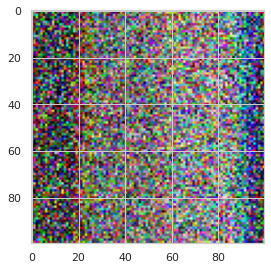

In [85]:
from random import randrange

randInt = randrange(0, 3476)
plt.imshow(d2_xTrain_REV[:,:,:, randInt])
print("new image shape", d2_xTrain_REV[:, :, :, randInt].shape)

In [86]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)

#d3_xTrain = pca.fit_transform(d2_xTrain)
#principalDf = pd.DataFrame(data = d3_xTrain, columns = ['principal component 1', 'principal component 2'])

In [89]:
## TRYING TO FIND THE BEST NEAREST NEIGHBOR OPTION BEFORE PLUGGING IN

scoreList=[]
#Let's find the optimal number k
for each in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(d2_xTrain,yTrain)
    scoreList.append(knn.score(xTest, yTest))
plt.figure(figsize=(7,5))
plt.plot(range(1,15),scoreList)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()


ValueError: ignored

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn import neighbors

# Define the number of neighbors to use for the KNN algorithm
n_neighbors = 5

# Load the dataset of images and labels
# x = np.array(...)  # this should be a 2D array where each row is an image
# y = np.array(...)  # this should be a 1D array of labels corresponding to the images

# Create the KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the model on the dataset
knn.fit(d3_xTrain, yTrain)

# Now you can use the trained model to predict labels for new images
predictions = knn.predict(d3_xTrain)[0:5]


In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load the dataset of images and labels
X = np.array(...)  # this should be a 2D array where each row is an image
y = np.array(...)  # this should be a 1D array of labels corresponding to the images

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100)

# Train the model on the dataset
model.fit(X, y)

# Now you can use the trained model to predict labels for new images
predictions = model.predict(...)